<a href="https://colab.research.google.com/github/YounkoA/Hough-transform/blob/main/sobel_hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hough transform
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04b_hough_transform/hough_transform.ipynb)



In [ ]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YounkoA/Hough-transform/blob/main/skyscrapers.jpg".split()
    )



In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

figsize = (10, 10)



In [ ]:
from google.colab import files
upload = files.upload()

Saving skyscrapers.jpg to skyscrapers.jpg


## Import an image


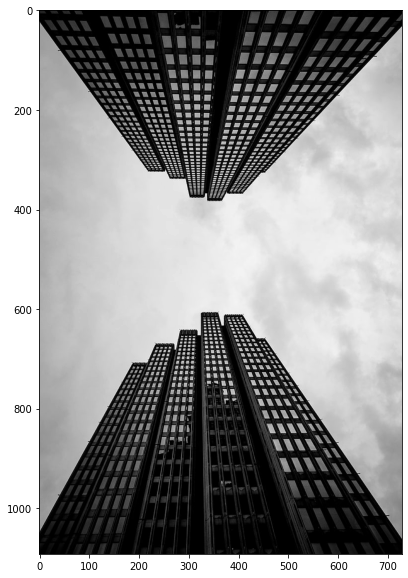

In [ ]:
im3 = cv2.imread("skyscrapers.jpg")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()



## Find edges of an image using Sobel
For more details about Sobel edge detection, look at lecture 3


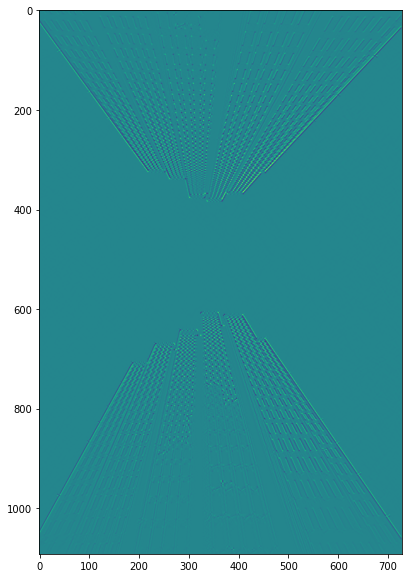

In [23]:
mag_im  = cv2.Sobel(src=im, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) #

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()



## Initialize accumulation matrix


In [24]:
# choose R size
r_step = 1
rmax = np.sqrt(im.shape[0] ** 2 + im.shape[1] ** 2)
r_vec = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi / 180
t_vec = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r_vec.shape[0], t_vec.shape[0]))



## Fill accumulation matrix


In [25]:
# get indices of edges
edge_inds = np.argwhere(mag_im > 0)

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t_vec):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x * np.cos(t0) + y * np.sin(t0)
        r_ind = np.argmin(np.abs(r0 - r_vec))

        acc_mat[r_ind, t_ind] += 1



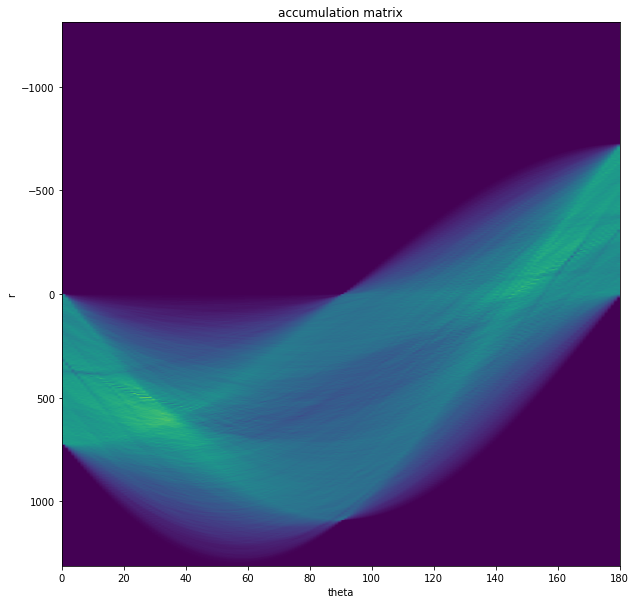

In [26]:
plt.figure(figsize=figsize)
plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix")
plt.show()



## Threshold accumulation matrix


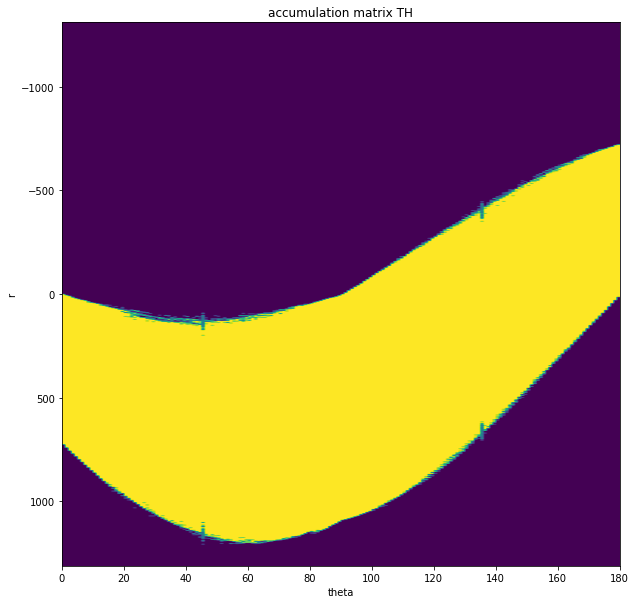

In [27]:
TH = 100
acc_mat_th = acc_mat > TH

plt.figure(figsize=figsize)
plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax], aspect="auto")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix TH")
plt.show()



## Plot lines found by hough


Output streaming akan dipotong hingga 5000 baris terakhir.
(rho,theta): (1074.579335731108, 33.0)
(rho,theta): (1074.579335731108, 34.00000000000001)
(rho,theta): (1074.579335731108, 35.0)
(rho,theta): (1074.579335731108, 36.0)
(rho,theta): (1074.579335731108, 37.0)
(rho,theta): (1074.579335731108, 38.00000000000001)
(rho,theta): (1074.579335731108, 38.99999999999999)
(rho,theta): (1074.579335731108, 40.0)
(rho,theta): (1074.579335731108, 41.0)
(rho,theta): (1074.579335731108, 42.0)
(rho,theta): (1074.579335731108, 43.0)
(rho,theta): (1074.579335731108, 44.0)
(rho,theta): (1074.579335731108, 45.0)
(rho,theta): (1074.579335731108, 46.0)
(rho,theta): (1074.579335731108, 47.0)
(rho,theta): (1074.579335731108, 48.0)
(rho,theta): (1074.579335731108, 48.99999999999999)
(rho,theta): (1074.579335731108, 50.0)
(rho,theta): (1074.579335731108, 51.0)
(rho,theta): (1074.579335731108, 52.00000000000001)
(rho,theta): (1074.579335731108, 53.0)
(rho,theta): (1074.579335731108, 54.0)
(rho,theta): (1074

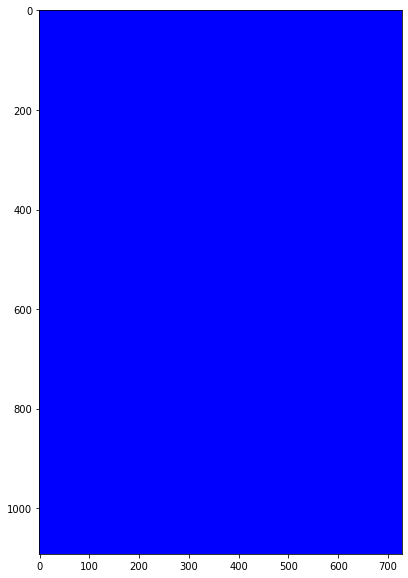

In [28]:
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = im3.copy()
for r_ind, t_ind in edge_inds:
    rho = r_vec[r_ind]
    theta = t_vec[t_ind]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Try cv2.HoughLines
This implementation is faster since it was done in C


Output streaming akan dipotong hingga 5000 baris terakhir.
(rho,theta): (505.0, 37.999999919081475)
(rho,theta): (486.0, 39.00000108527387)
(rho,theta): (496.0, 39.00000108527387)
(rho,theta): (621.0, 39.00000108527387)
(rho,theta): (488.0, 42.99999891985429)
(rho,theta): (478.0, 47.000000169529294)
(rho,theta): (1046.0, 48.00000133572169)
(rho,theta): (460.0, 50.999998004109706)
(rho,theta): (376.0, 53.0000003364945)
(rho,theta): (402.0, 56.00000041997711)
(rho,theta): (431.0, 59.00000050345972)
(rho,theta): (396.0, 60.000001669652114)
(rho,theta): (308.0, 61.00000283584451)
(rho,theta): (539.0, 66.99999617262054)
(rho,theta): (382.0, 73.99999750577815)
(rho,theta): (393.0, 73.99999750577815)
(rho,theta): (307.0, 78.99999650655097)
(rho,theta): (314.0, 79.99999767274336)
(rho,theta): (412.0, 86.99999900590097)
(rho,theta): (452.0, 94.00000033905859)
(rho,theta): (454.0, 96.00000267144338)
(rho,theta): (148.0, 100.00000050602378)
(rho,theta): (145.0, 101.00000167221619)
(rho,theta): (1

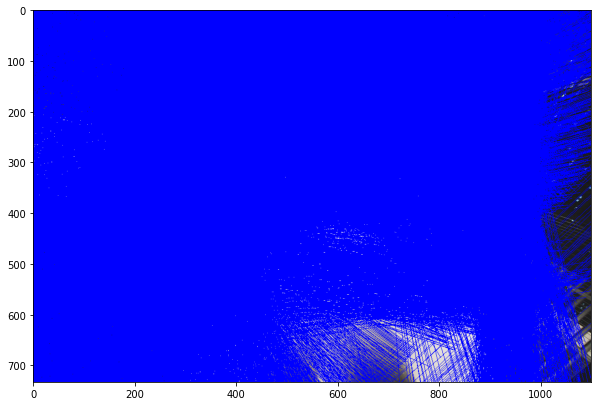

In [ ]:
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()



## Complete new example of a more complex image
We can see on the bottom horizontal lines that the "noise" of the tree top edges is interfeering with the line detection.


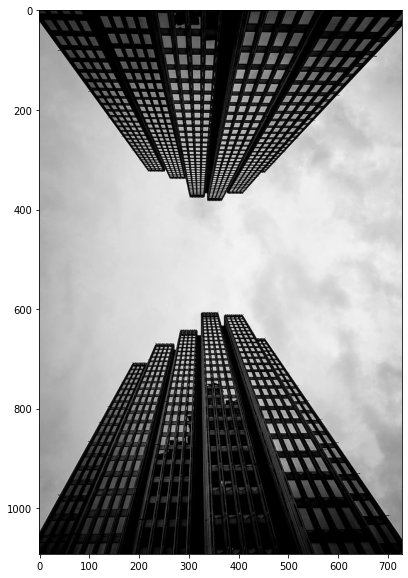

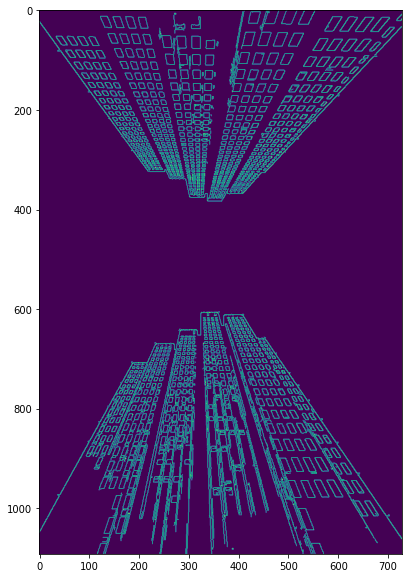

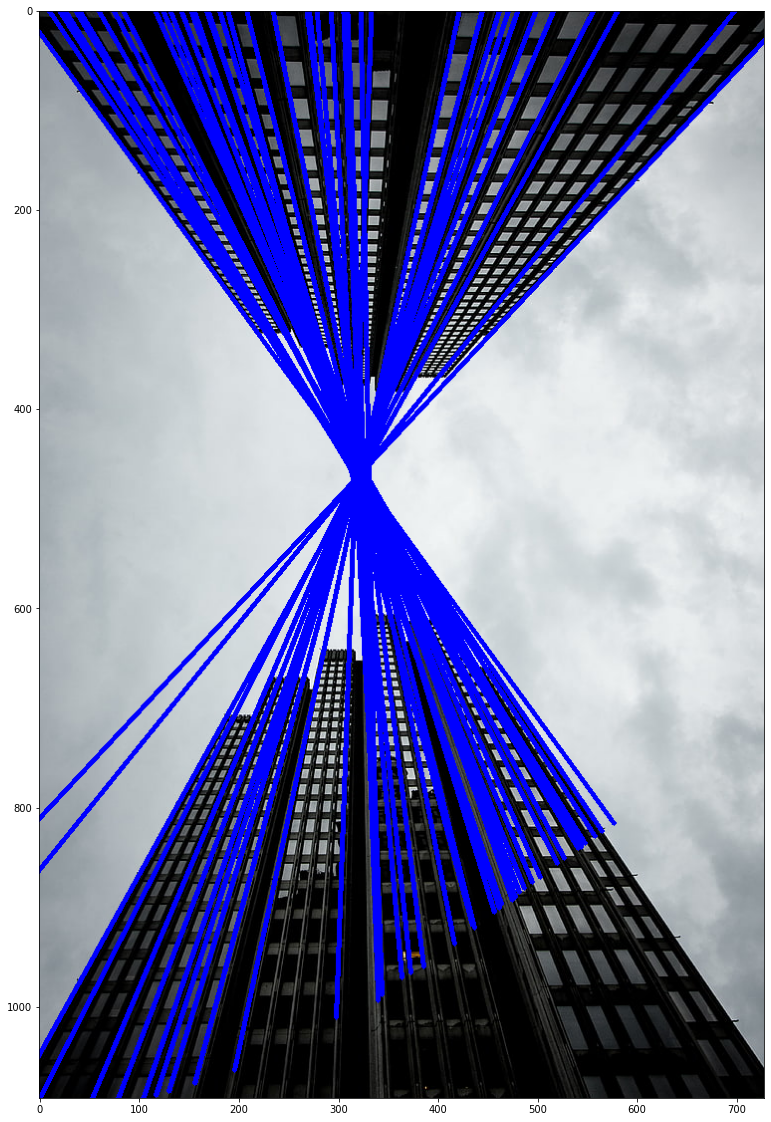

In [29]:
im3 = cv2.imread("skyscrapers.jpg")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()

mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()

TH = 247
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()

